# Prueba para joint 1 con movimiento sinusoidal
## Coding
### Importando librerías

In [1]:
#importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Plotting data
### Muestra de data para una ventana de 3000 datos

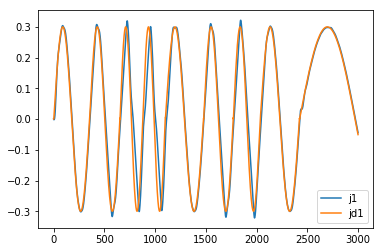

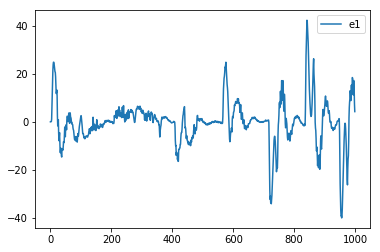

In [34]:
df = pd.read_csv('training_data_joint1.csv')
df_eval = pd.read_csv('evaluation_data_joint1.csv')
df_val = pd.read_csv('validation_data_joint1.csv')
fig1 = plt.figure()
df.j1[0:3000].plot()
df.jd1[0:3000].plot(); plt.legend(loc='best')
fig2 = plt.figure(); df.e1[0:1000].plot(); plt.legend(loc='best')

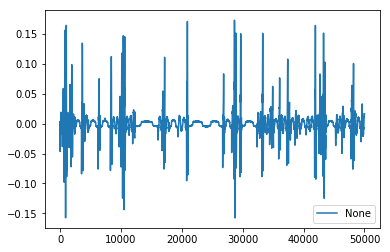

In [3]:
delta_j1 = df.j1 - df.jd1
fig3 = plt.figure(); delta_j1.plot(); plt.legend(loc='best')
#delta_j7.head()
df['delta_j1'] = delta_j1


<Figure size 432x288 with 0 Axes>

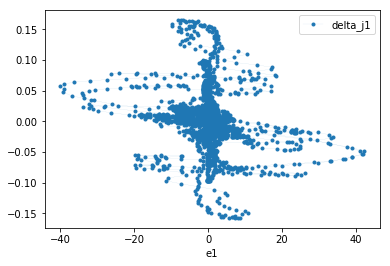

In [6]:
fig4 = plt.figure(); df[0:3000].plot(x = 'e1', y = 'delta_j1', marker='.',lw=0.05); plt.legend(loc='best')

## New DataBase

In [35]:
df =df.join(
    pd.concat(
        {'j1_n_{}'.format(i): df.j1.shift(i) for i in range(10)},
        axis=1))
df = df.join( pd.concat(
        {'e1_n_{}'.format(i): df.e1.shift(i) for i in range(10)},
        axis=1))
df = df.dropna()

df_eval =df_eval.join(
    pd.concat(
        {'j1_n_{}'.format(i): df_eval.j1.shift(i) for i in range(10)},
        axis=1))
df_eval = df_eval.join( pd.concat(
        {'e1_n_{}'.format(i): df_eval.e1.shift(i) for i in range(10)},
        axis=1))
df_eval = df_eval.dropna()

df_val =df_val.join(
    pd.concat(
        {'j1_n_{}'.format(i): df_val.j1.shift(i) for i in range(10)},
        axis=1))
df_val = df_val.join( pd.concat(
        {'e1_n_{}'.format(i): df_val.e1.shift(i) for i in range(10)},
        axis=1))
df_val = df_val.dropna()

### Prueba de validación para modelo FRNN
#### Solo Neuronas Lineales (model1)
Se utiliza un modelo de 1 input layer de 100 neuronas lineales, 3 hidden layers de 100 neuronas lineales y 1 output layer de 1 neurona lineal.  

In [20]:
df

Unnamed: 0        j1   j2   j3   j4   j5   j6   j7       jd1  jd2  \
9               9  0.002739  0.0  0.0  0.0  0.0  0.0  0.0  0.040541  0.0   
10             10  0.005215  0.0  0.0  0.0  0.0  0.0  0.0  0.045812  0.0   
11             11  0.008000  0.0  0.0  0.0  0.0  0.0  0.0  0.051085  0.0   
12             12  0.011711  0.0  0.0  0.0  0.0  0.0  0.0  0.056364  0.0   
13             13  0.015731  0.0  0.0  0.0  0.0  0.0  0.0  0.061563  0.0   
14             14  0.020375  0.0  0.0  0.0  0.0  0.0  0.0  0.066813  0.0   
15             15  0.025526  0.0  0.0  0.0  0.0  0.0  0.0  0.071991  0.0   
16             16  0.031097  0.0  0.0  0.0  0.0  0.0  0.0  0.077180  0.0   
17             17  0.037182  0.0  0.0  0.0  0.0  0.0  0.0  0.082314  0.0   
18             18  0.043465  0.0  0.0  0.0  0.0  0.0  0.0  0.087441  0.0   
19             19  0.050270  0.0  0.0  0.0  0.0  0.0  0.0  0.092572  0.0   
20             20  0.057486  0.0  0.0  0.0  0.0  0.0  0.0  0.097613  0.0   
21             21  0.065012  0.0  0.0  0.0  0.0  0.0  0.0  0.102665  0.0   
22             22  0.071919  0.0  0.0  0.0  0.0  0.0  0.0  0.107676  0.0   
23             23  0.079554  0.0  0.0  0.0  0.0  0.0  0.0  0.112635  0.0   
24             24  0.088423  0.0  0.0  0.0  0.0  0.0  0.0  0.117563  0.0   
25             25  0.095742  0.0  0.0  0.0  0.0  0.0  0.0  0.122460  0.0   
26             26  0.103680  0.0  0.0  0.0  0.0  0.0  0.0  0.127355  0.0   
27             27  0.112343  0.0  0.0  0.0  0.0  0.0  0.0  0.132174  0.0   
28             28  0.119147  0.0  0.0  0.0  0.0  0.0  0.0  0.136927  0.0   
29             29  0.127812  0.0  0.0  0.0  0.0  0.0  0.0  0.141673  0.0   
30             30  0.135233  0.0  0.0  0.0  0.0  0.0  0.0  0.146378  0.0   
31             31  0.141729  0.0  0.0  0.0  0.0  0.0  0.0  0.151020  0.0   
32             32  0.148645  0.0  0.0  0.0  0.0  0.0  0.0  0.155598  0.0   
33             33  0.156169  0.0  0.0  0.0  0.0  0.0  0.0  0.160139  0.0   
34             34  0.162562  0.0  0.0  0.0  0.0  0.0  0.0  0.164650  0.0   
35             35  0.168646  0.0  0.0  0.0  0.0  0.0  0.0  0.169080  0.0   
36             36  0.174423  0.0  0.0  0.0  0.0  0.0  0.0  0.173565  0.0   
37             37  0.179787  0.0  0.0  0.0  0.0  0.0  0.0  0.177810  0.0   
38             38  0.184630  0.0  0.0  0.0  0.0  0.0  0.0  0.182154  0.0   
...           ...       ...  ...  ...  ...  ...  ...  ...       ...  ...   
49971       49971  0.236206  0.0  0.0  0.0  0.0  0.0  0.0  0.224589  0.0   
49972       49972  0.233422  0.0  0.0  0.0  0.0  0.0  0.0  0.221656  0.0   
49973       49973  0.230533  0.0  0.0  0.0  0.0  0.0  0.0  0.218913  0.0   
49974       49974  0.227646  0.0  0.0  0.0  0.0  0.0  0.0  0.215693  0.0   
49975       49975  0.224758  0.0  0.0  0.0  0.0  0.0  0.0  0.211882  0.0   
49976       49976  0.221870  0.0  0.0  0.0  0.0  0.0  0.0  0.209697  0.0   
49977       49977  0.218873  0.0  0.0  0.0  0.0  0.0  0.0  0.206530  0.0   
49978       49978  0.215882  0.0  0.0  0.0  0.0  0.0  0.0  0.203290  0.0   
49979       49979  0.212892  0.0  0.0  0.0  0.0  0.0  0.0  0.200023  0.0   
49980       49980  0.209694  0.0  0.0  0.0  0.0  0.0  0.0  0.196740  0.0   
49981       49981  0.206807  0.0  0.0  0.0  0.0  0.0  0.0  0.192610  0.0   
49982       49982  0.203507  0.0  0.0  0.0  0.0  0.0  0.0  0.189224  0.0   
49983       49983  0.200517  0.0  0.0  0.0  0.0  0.0  0.0  0.185061  0.0   
49984       49984  0.193917  0.0  0.0  0.0  0.0  0.0  0.0  0.181336  0.0   
49985       49985  0.193917  0.0  0.0  0.0  0.0  0.0  0.0  0.178330  0.0   
49986       49986  0.190817  0.0  0.0  0.0  0.0  0.0  0.0  0.175949  0.0   
49987       49987  0.187209  0.0  0.0  0.0  0.0  0.0  0.0  0.172470  0.0   
49988       49988  0.183909  0.0  0.0  0.0  0.0  0.0  0.0  0.168838  0.0   
49989       49989  0.180302  0.0  0.0  0.0  0.0  0.0  0.0  0.165165  0.0   
49990       49990  0.176796  0.0  0.0  0.0  0.0  0.0  0.0  0.161482  0.0   
49991       49991  0.173291  0.0  0.0  0.0  0.0  0.0  0

In [36]:
model1 = Sequential()
model1.add(Dense(units=100, activation='linear', input_dim=20))
model1.add(Dense(units=100, activation='linear'))
model1.add(Dense(units=100, activation='linear'))
model1.add(Dense(units=1, activation='linear'))

model1.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

(number_training_data, _) = df.shape
q0_tmp = df.j1_n_0.values.reshape(number_training_data,1)
q1_tmp = df.j1_n_1.values.reshape(number_training_data,1)
q2_tmp = df.j1_n_2.values.reshape(number_training_data,1)
q3_tmp = df.j1_n_3.values.reshape(number_training_data,1)
q4_tmp = df.j1_n_4.values.reshape(number_training_data,1)
q5_tmp = df.j1_n_5.values.reshape(number_training_data,1)
q6_tmp = df.j1_n_6.values.reshape(number_training_data,1)
q7_tmp = df.j1_n_7.values.reshape(number_training_data,1)
q8_tmp = df.j1_n_8.values.reshape(number_training_data,1)
q9_tmp = df.j1_n_9.values.reshape(number_training_data,1)
T0_tmp = df.e1_n_0.values.reshape(number_training_data,1)
T1_tmp = df.e1_n_1.values.reshape(number_training_data,1)
T2_tmp = df.e1_n_2.values.reshape(number_training_data,1)
T3_tmp = df.e1_n_3.values.reshape(number_training_data,1)
T4_tmp = df.e1_n_4.values.reshape(number_training_data,1)
T5_tmp = df.e1_n_5.values.reshape(number_training_data,1)
T6_tmp = df.e1_n_6.values.reshape(number_training_data,1)
T7_tmp = df.e1_n_7.values.reshape(number_training_data,1)
T8_tmp = df.e1_n_8.values.reshape(number_training_data,1)
T9_tmp = df.e1_n_9.values.reshape(number_training_data,1)
qd_tmp = df.jd1
x_train = np.concatenate([q0_tmp,q1_tmp,q2_tmp,q3_tmp,q4_tmp,q5_tmp,q6_tmp,q7_tmp,q8_tmp,q9_tmp, T0_tmp,T1_tmp,T2_tmp,T3_tmp,T4_tmp,T5_tmp,T6_tmp,T7_tmp,T8_tmp,T9_tmp], axis =1)
y_train = qd_tmp.values.reshape(number_training_data,1)

In [37]:
model1.fit(x_train, y_train, epochs=20, batch_size=50)

Epoch 1/20
49992/49992 [==============================] - 5s 97us/step - loss: 0.1067 - acc: 0.0000e+00
Epoch 2/20
49992/49992 [==============================] - 5s 95us/step - loss: 0.0145 - acc: 0.0000e+00
Epoch 3/20
49992/49992 [==============================] - 5s 94us/step - loss: 0.0053 - acc: 0.0000e+00
Epoch 4/20
49992/49992 [==============================] - 4s 85us/step - loss: 0.0026 - acc: 0.0000e+00
Epoch 5/20
49992/49992 [==============================] - 4s 90us/step - loss: 0.0022 - acc: 0.0000e+00
Epoch 6/20
49992/49992 [==============================] - 5s 94us/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 7/20
49992/49992 [==============================] - 5s 92us/step - loss: 0.0012 - acc: 0.0000e+00
Epoch 8/20
49992/49992 [==============================] - 4s 89us/step - loss: 0.0011 - acc: 0.0000e+00
Epoch 9/20
49992/49992 [==============================] - 4s 90us/step - loss: 9.0000e-04 - acc: 0.0000e+00
Epoch 10/20
49992/49992 [==============================] - 4

In [39]:
(number_evaluation_data, _) = df_eval.shape
q0_tmp = df_eval.j1_n_0.values.reshape(number_evaluation_data,1)
q1_tmp = df_eval.j1_n_1.values.reshape(number_evaluation_data,1)
q2_tmp = df_eval.j1_n_2.values.reshape(number_evaluation_data,1)
q3_tmp = df_eval.j1_n_3.values.reshape(number_evaluation_data,1)
q4_tmp = df_eval.j1_n_4.values.reshape(number_evaluation_data,1)
q5_tmp = df_eval.j1_n_5.values.reshape(number_evaluation_data,1)
q6_tmp = df_eval.j1_n_6.values.reshape(number_evaluation_data,1)
q7_tmp = df_eval.j1_n_7.values.reshape(number_evaluation_data,1)
q8_tmp = df_eval.j1_n_8.values.reshape(number_evaluation_data,1)
q9_tmp = df_eval.j1_n_9.values.reshape(number_evaluation_data,1)
T0_tmp = df_eval.e1_n_0.values.reshape(number_evaluation_data,1)
T1_tmp = df_eval.e1_n_1.values.reshape(number_evaluation_data,1)
T2_tmp = df_eval.e1_n_2.values.reshape(number_evaluation_data,1)
T3_tmp = df_eval.e1_n_3.values.reshape(number_evaluation_data,1)
T4_tmp = df_eval.e1_n_4.values.reshape(number_evaluation_data,1)
T5_tmp = df_eval.e1_n_5.values.reshape(number_evaluation_data,1)
T6_tmp = df_eval.e1_n_6.values.reshape(number_evaluation_data,1)
T7_tmp = df_eval.e1_n_7.values.reshape(number_evaluation_data,1)
T8_tmp = df_eval.e1_n_8.values.reshape(number_evaluation_data,1)
T9_tmp = df_eval.e1_n_9.values.reshape(number_evaluation_data,1)
qd_tmp = df_eval.jd1
x_eval = np.concatenate([q0_tmp,q1_tmp,q2_tmp,q3_tmp,q4_tmp,q5_tmp,q6_tmp,q7_tmp,q8_tmp,q9_tmp, T0_tmp,T1_tmp,T2_tmp,T3_tmp,T4_tmp,T5_tmp,T6_tmp,T7_tmp,T8_tmp,T9_tmp], axis =1)
y_eval = qd_tmp.values.reshape(number_evaluation_data,1)

In [40]:
model1.evaluate(x_eval, y_eval, batch_size=50)

9992/9992 [==============================] - 1s 55us/step


[0.00015861121346947974, 0.0]

In [41]:
(number_validation_data, _) = df_val.shape
q0_tmp = df_val.j1_n_0.values.reshape(number_validation_data,1)
q1_tmp = df_val.j1_n_1.values.reshape(number_validation_data,1)
q2_tmp = df_val.j1_n_2.values.reshape(number_validation_data,1)
q3_tmp = df_val.j1_n_3.values.reshape(number_validation_data,1)
q4_tmp = df_val.j1_n_4.values.reshape(number_validation_data,1)
q5_tmp = df_val.j1_n_5.values.reshape(number_validation_data,1)
q6_tmp = df_val.j1_n_6.values.reshape(number_validation_data,1)
q7_tmp = df_val.j1_n_7.values.reshape(number_validation_data,1)
q8_tmp = df_val.j1_n_8.values.reshape(number_validation_data,1)
q9_tmp = df_val.j1_n_9.values.reshape(number_validation_data,1)
T0_tmp = df_val.e1_n_0.values.reshape(number_validation_data,1)
T1_tmp = df_val.e1_n_1.values.reshape(number_validation_data,1)
T2_tmp = df_val.e1_n_2.values.reshape(number_validation_data,1)
T3_tmp = df_val.e1_n_3.values.reshape(number_validation_data,1)
T4_tmp = df_val.e1_n_4.values.reshape(number_validation_data,1)
T5_tmp = df_val.e1_n_5.values.reshape(number_validation_data,1)
T6_tmp = df_val.e1_n_6.values.reshape(number_validation_data,1)
T7_tmp = df_val.e1_n_7.values.reshape(number_validation_data,1)
T8_tmp = df_val.e1_n_8.values.reshape(number_validation_data,1)
T9_tmp = df_val.e1_n_9.values.reshape(number_validation_data,1)
qd_tmp = df_val.jd1
x_val = np.concatenate([q0_tmp,q1_tmp,q2_tmp,q3_tmp,q4_tmp,q5_tmp,q6_tmp,q7_tmp,q8_tmp,q9_tmp, T0_tmp,T1_tmp,T2_tmp,T3_tmp,T4_tmp,T5_tmp,T6_tmp,T7_tmp,T8_tmp,T9_tmp], axis =1)
y_val = qd_tmp.values.reshape(number_validation_data,1)

In [45]:
y1_pred = model1.predict(x_val)
df_val['y1_pred'] = y1_pred

<Figure size 432x288 with 0 Axes>

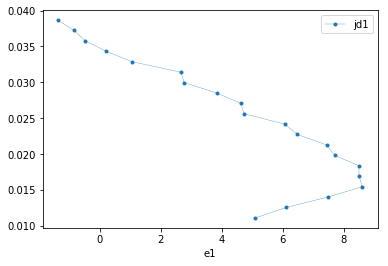

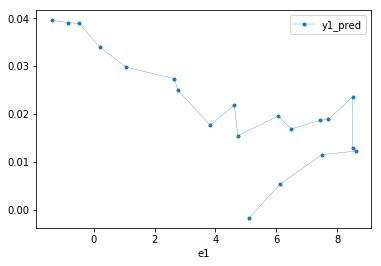

In [46]:
fig5 = plt.figure(); df_val[0:20].plot(x = 'e1', y = 'jd1', marker='.',lw=0.3)
df_val[0:20].plot(x = 'e1', y = 'y1_pred', marker='.',lw=0.3); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

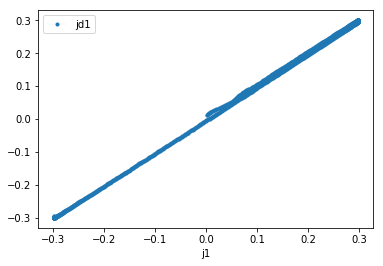

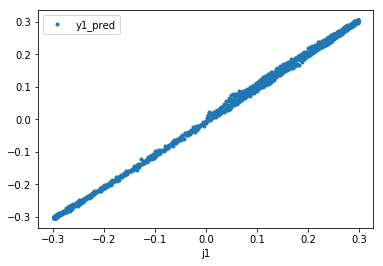

In [47]:
fig6 = plt.figure(); df_val[0:1000].plot(x = 'j1', y = 'jd1', marker='.',lw=0.05)
df_val[0:1000].plot(x = 'j1', y = 'y1_pred', marker='.',lw=0.05); plt.legend(loc='best')